#### 판다스 내장 그래프 도구
Pandas는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있습니다. 다양한 종류의 그래프를 그릴 수 있으며, 각 그래프는 데이터를 시각화하는 데 유용한 정보를 제공합니다.
- 선 그래프 (Line Plot) :
가장 기본적인 선 그래프를 그리며, 시간에 따른 데이터 변화를 시각화하는 데 유용합니다.
- 막대 그래프 (Bar Plot) :
카테고리형 데이터를 시각화하는 데 유용합니다.
- 수평 막대 그래프 (Horizontal Bar Plot) :
카테고리형 데이터를 수평으로 시각화하며, 누적 옵션과 투명도 적용이 가능합니다.
- 히스토그램 (Histogram) :
데이터의 분포를 시각화하는 데 유용합니다.
- 산점도 (Scatter Plot) :
두 변수 간의 관계를 시각화하며, 상관관계를 확인할 수 있습니다.
- 박스 플롯 (Box Plot) :
데이터의 분포와 분산 정도를 시각화하며, 이상치(outliers)를 확인하는 데 유용합니다.
- 면적 그래프 (Area Plot)
면적 그래프는 시간에 따른 데이터의 변화를 누적하여 시각화하는 데 유용합니다. 여러 시계열 데이터를 하나의 플롯에 그릴 수 있으며, 누적된 값의 변화를 시각적으로 쉽게 파악할 수 있습니다.
- 파이 차트 (Pie Chart) :
카테고리형 데이터의 비율을 시각화하는 데 유용합니다.
- 커널 밀도 추정 그래프 (KDE Plot) :
데이터의 확률 밀도 함수를 시각화하며, 데이터의 분포를 부드럽게 나타냅니다.

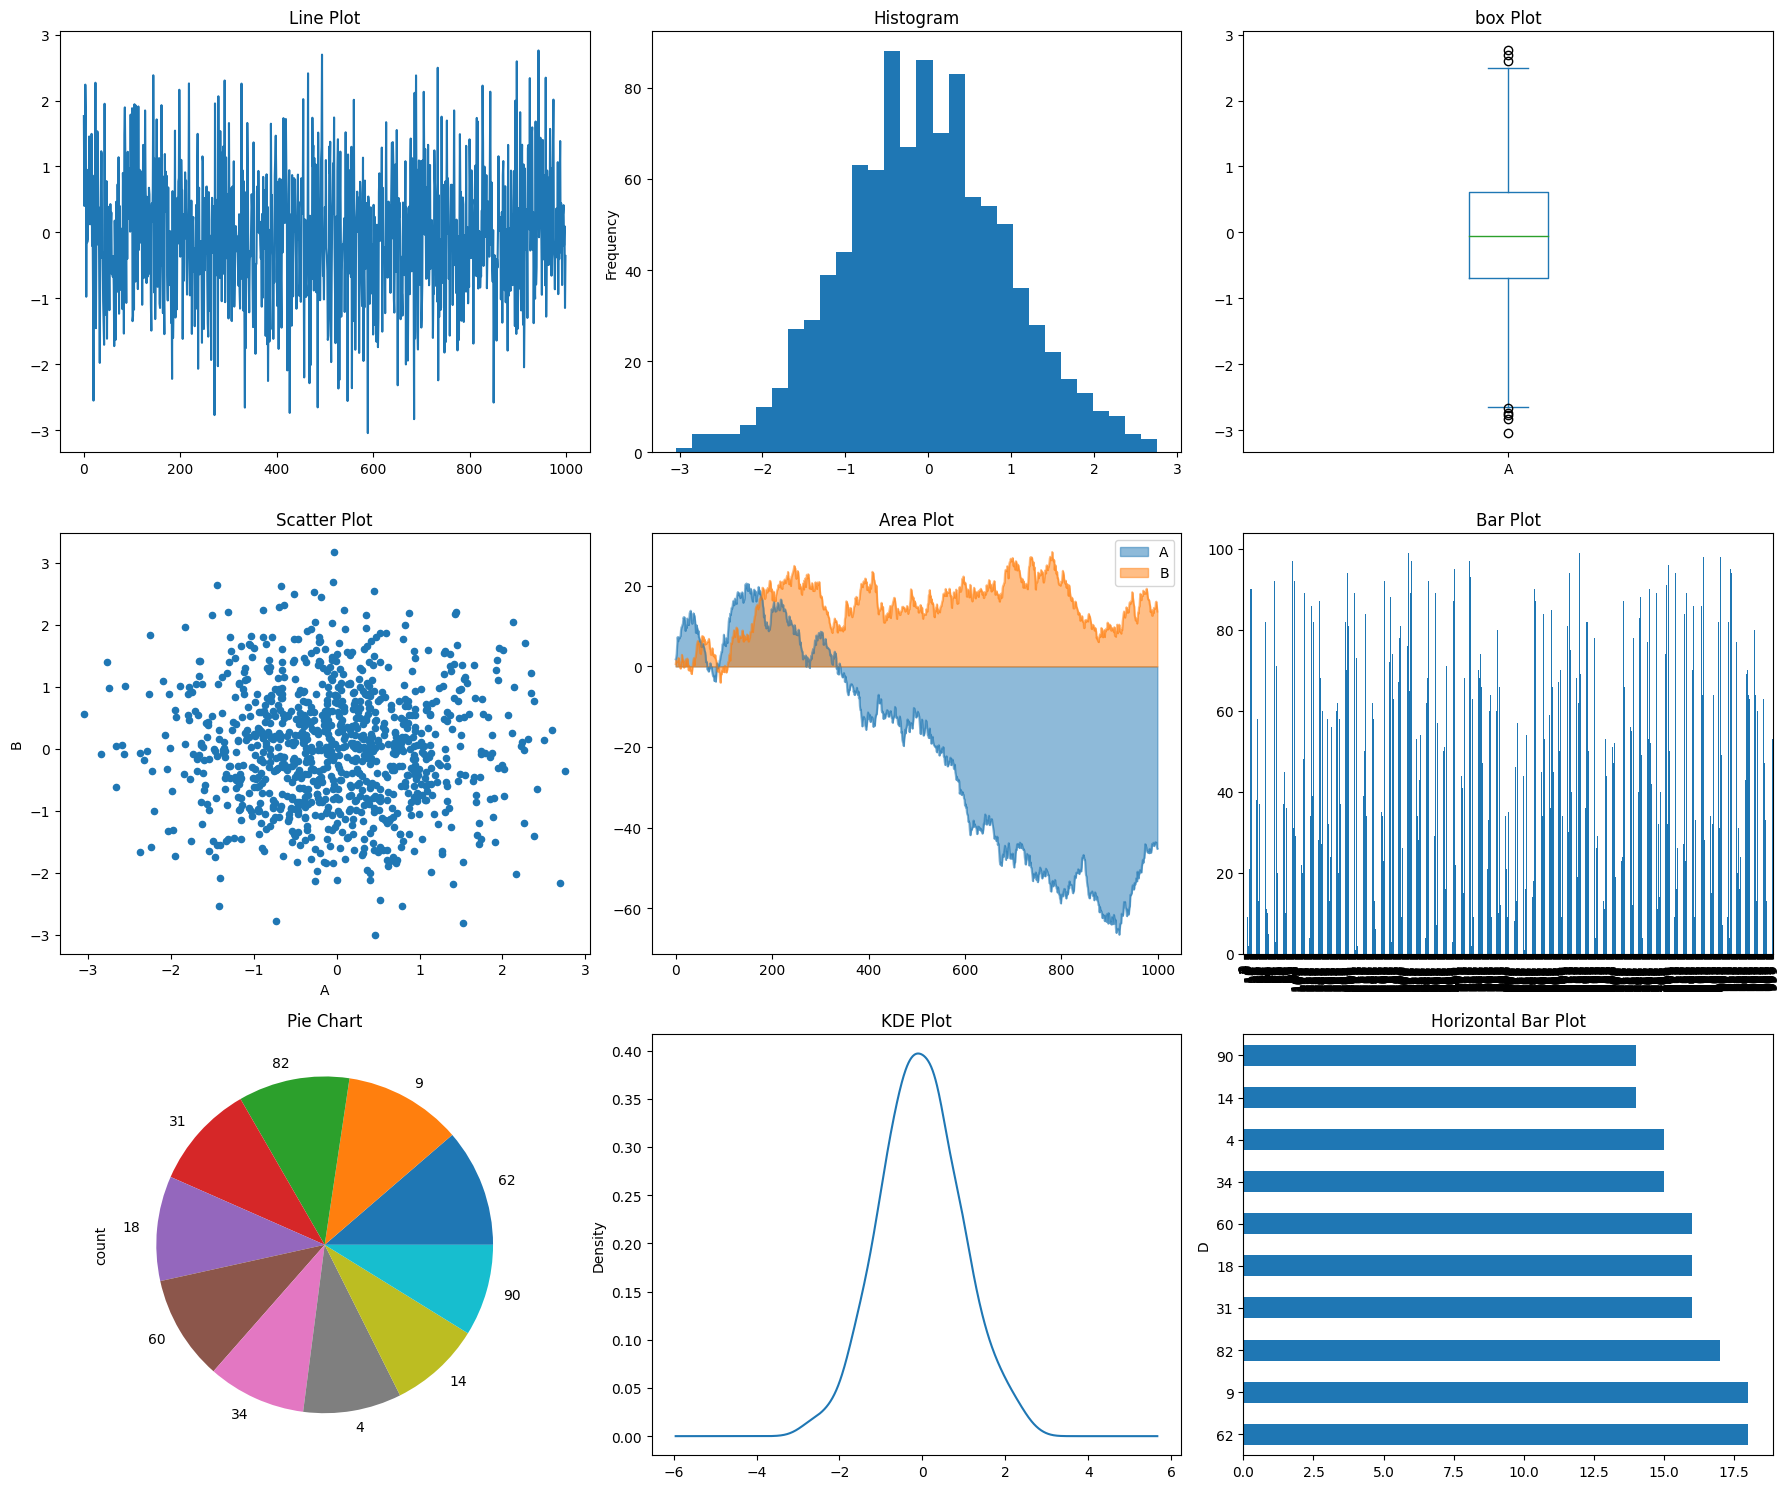

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 생성
np.random.seed(0)
df=pd.DataFrame({
    'A':np.random.randn(1000),
    'B':np.random.randn(1000),
    'C':np.random.randn(1000)*100,
    'D':np.random.randint(1,100, 1000)

})

## 데이터 프레임을 3행 3열 형태로 플롯
fig, axes = plt.subplots(3,3, figsize=(18,15))

# Line
df['A'].plot(ax=axes[0,0], title='Line Plot')

# 히스토그램
df['A'].plot(kind='hist', bins=30, ax=axes[0,1], title='Histogram')

# 박스
df['A'].plot(kind='box', ax=axes[0,2], title='box Plot')

## 산점도
df.plot(kind='scatter', x='A', y='B', ax=axes[1,0], title='Scatter Plot')


## 면적그래프 (stacked =False는 두 시리즈가 겹치지 않도록 하는 옵션)
df[['A','B']].cumsum().plot(kind='area', ax=axes[1,1], title='Area Plot', stacked=False)


## 막대 그래프
df['D'].plot(kind='bar', ax=axes[1,2], title='Bar Plot')

## 파이 차트 (상위 10개만 plot)
df['D'].value_counts().head(10).plot(kind='pie', ax=axes[2,0], title='Pie Chart')

## 커널 밀도 추정 그래프
df['A'].plot(kind='kde', ax=axes[2,1], title='KDE Plot')

## 수평 막대 그래프
df['D'].value_counts().head(10).plot(kind='barh', ax=axes[2,2], title='Horizontal Bar Plot')

# layout 조정
plt.tight_layout()
plt.show()

        Num
0 -1.230584
1 -0.753879
2  1.310420
3 -0.772279
4 -0.191196 

                  Num
count  1000000.000000
mean         0.001144
std          0.999813
min         -4.431253
25%         -0.672118
50%          0.001696
75%          0.676309
max          4.536117
Axes(0.125,0.11;0.775x0.77)


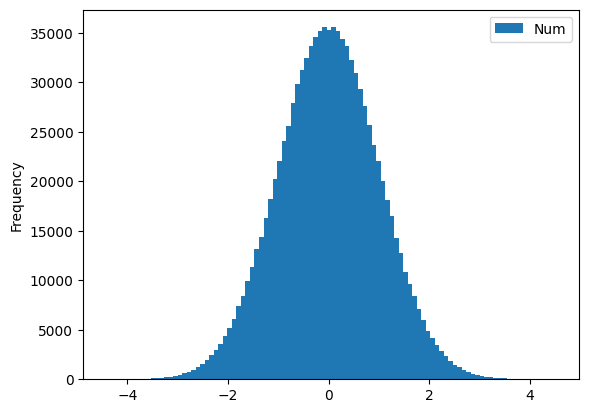

In [9]:
## Q. 통계요약표 및 시각화를 수행하세요 (컬럼명: "Num")
## 통계 요약표 및 시각화 수행
data=np.random.randn(1000000)
df=pd.DataFrame(data, columns=['Num'])
print(df.head(), '\n')
print(df.describe())
print(df.plot(kind='hist', bins=100))

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815 

                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698
Axes(0.125,0.11;0.775x0.77)


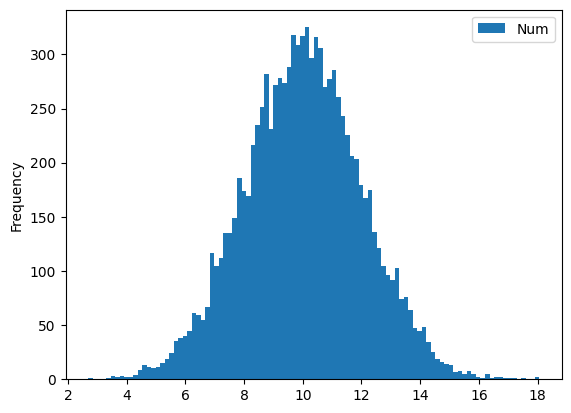

In [11]:
from scipy import stats
np.random.seed(1)
sample1=stats.norm.rvs(loc=10, scale=2, size=10000)
df1=pd.DataFrame(sample1, columns=['Num'])
print(df1.head(), '\n')
print(df1.describe())
print(df1.plot(kind='hist', bins=100))

         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815 

                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698
Axes(0.125,0.11;0.775x0.77)


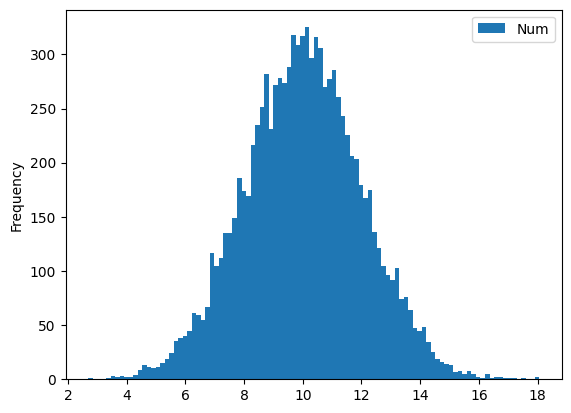

In [16]:
from scipy import stats
np.random.seed(1)
sample1=np.random.normal(loc=10, scale=2, size=10000)
df1=pd.DataFrame(sample1, columns=['Num'])
print(df1.head(), '\n')
print(df1.describe())
print(df1.plot(kind='hist', bins=100))

In [17]:
## 0,1 사이의 균일 분포에서 6행 4열 난수 추출
df=pd.DataFrame(np.random.rand(6,4),
                index=['one','two','three','four','five','six'],
                columns=['A','B','C','D'])
print(df)

              A         B         C         D
one    0.865081  0.032853  0.933223  0.267461
two    0.124448  0.340698  0.765585  0.090553
three  0.310120  0.890913  0.894145  0.270737
four   0.335384  0.077759  0.169704  0.280080
five   0.314396  0.789679  0.982823  0.394681
six    0.787791  0.204297  0.848268  0.705182


<Axes: >

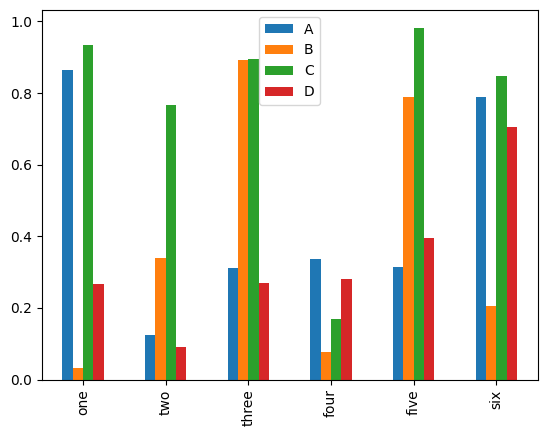

In [18]:
df.plot(kind='bar')

<Axes: >

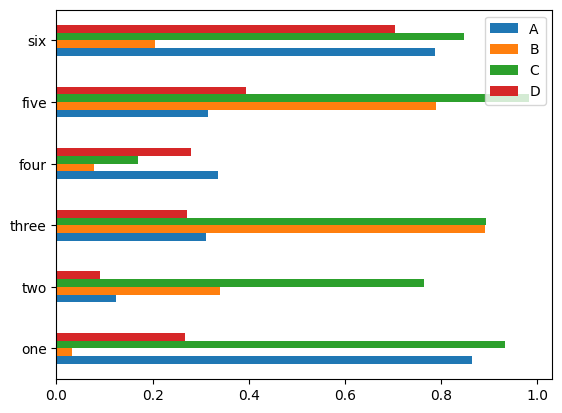

In [19]:
df.plot(kind='barh')

<Axes: >

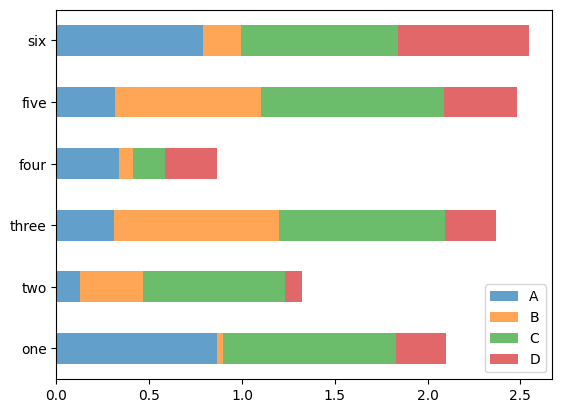

In [20]:
df.plot(kind='barh', stacked=True, alpha=0.7)

In [25]:
## Q. df에 대해서 수직 막대 그래프, 수평 막대그래프, 수직 스택막대, 수평 스택 막대 그래프를 그리세요
df=pd.DataFrame(np.random.rand(8,3),
                index=['P1','P2','P3','P4','P5','P6','P7','P8'],
                columns=pd.Index(['A','B','C'], name='Species'))
df

Species,A,B,C
P1,0.834989,0.070891,0.353019
P2,0.873102,0.351246,0.989064
P3,0.315830,0.306787,0.875812
P4,0.579594,0.295949,0.185974
P5,0.822583,0.856833,0.728582
P6,0.321001,0.631848,0.572933
P7,0.480921,0.026481,0.520964
P8,0.230016,0.465778,0.044200


<Axes: >

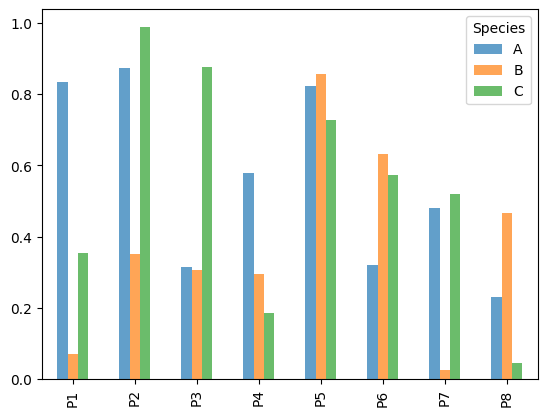

In [33]:
df.plot(kind='bar', alpha=0.7)

<Axes: >

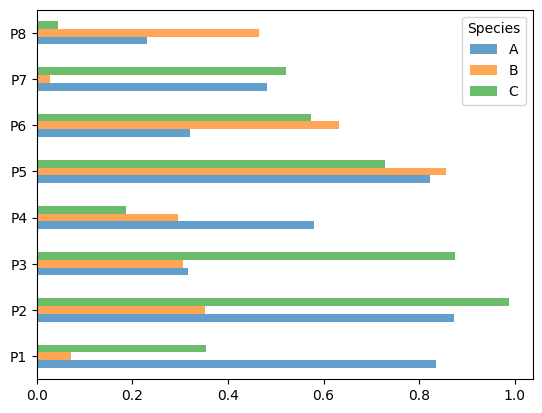

In [34]:
df.plot(kind='barh', alpha=0.7)

<Axes: >

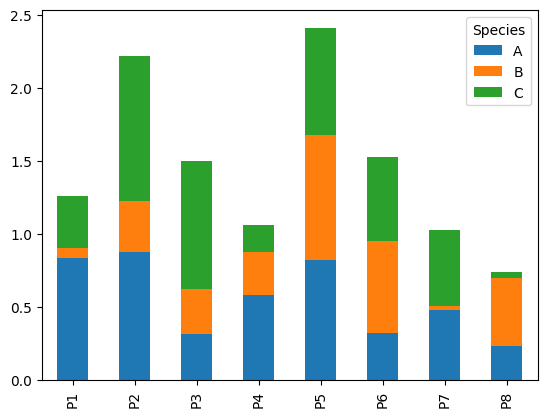

In [31]:
df.plot(kind='bar', stacked=True)

<Axes: >

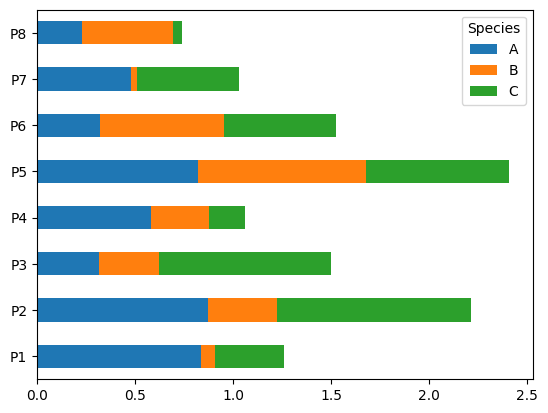

In [32]:
df.plot(kind='barh', stacked=True)

Text(0.5, 1.0, 'Stacked Horizontal Bar Chart')

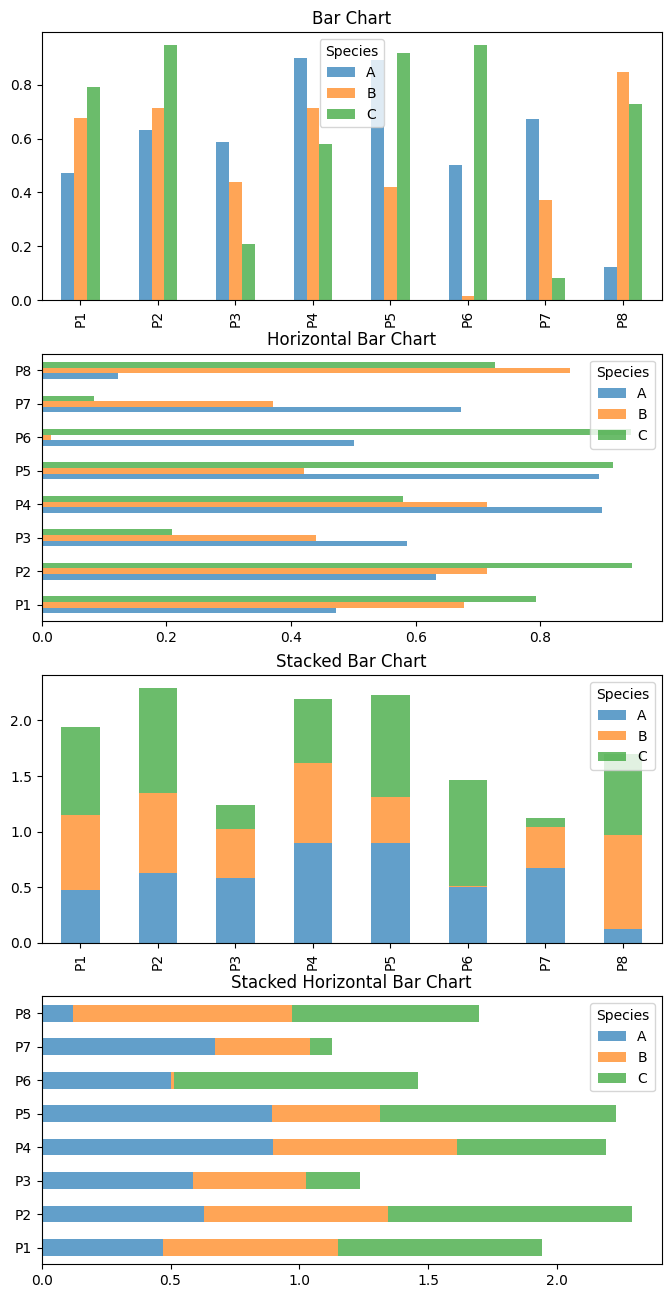

In [39]:
# Using sub plots
df=pd.DataFrame(np.random.rand(8,3), index=['P1','P2','P3','P4','P5','P6','P7','P8'],columns=pd.Index(['A','B','C'], name='Species'))

#fig, axes = plt.subplots(4,1, figsize=(8,16))
fig, axes = plt.subplots(nrows=4,ncols=1, figsize=(8,16))

df.plot(kind='bar', alpha=0.7, ax=axes[0])
axes[0].set_title('Bar Chart')
df.plot(kind='barh', alpha=0.7, ax=axes[1])
axes[1].set_title('Horizontal Bar Chart')
df.plot(kind='bar', stacked=True, alpha=0.7, ax=axes[2])
axes[2].set_title('Stacked Bar Chart')
df.plot(kind='barh', stacked=True, alpha=0.7, ax=axes[3])
axes[3].set_title('Stacked Horizontal Bar Chart')


<Axes: title={'center': 'Horizontal Bar Chart'}>

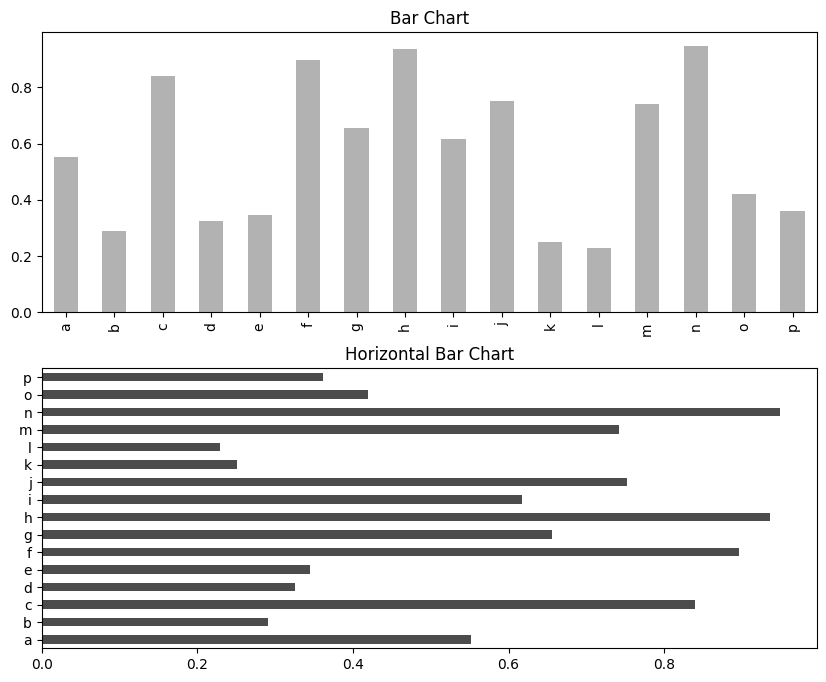

In [43]:
fig,axes=plt.subplots(2,1, figsize=(10,8))
data=pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.3, title='Bar Chart')
data.plot.barh(ax=axes[1], color='k', alpha=0.7, title='Horizontal Bar Chart')


## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)
- sns.heatmap(data,)

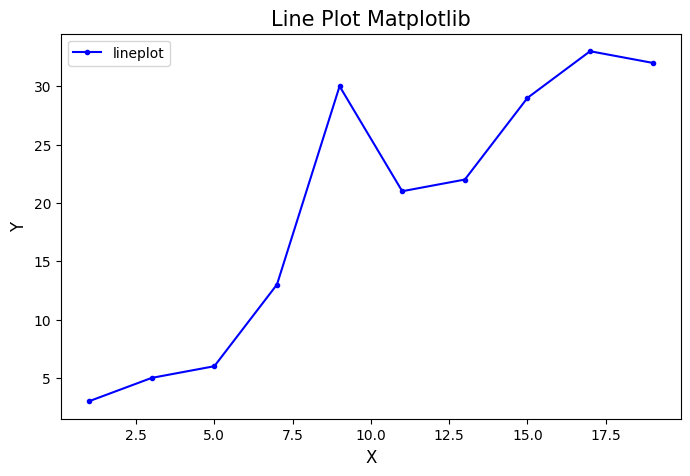

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x=np.arange(1,21,2)
y=np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(8,5))
plt.plot(x,y, color='b', marker='o', markersize=3)
plt.title('Line Plot Matplotlib', size=15)
plt.xlabel('X', size=12)
plt.ylabel('Y', size=12)
plt.legend(labels=['lineplot'])
plt.show()


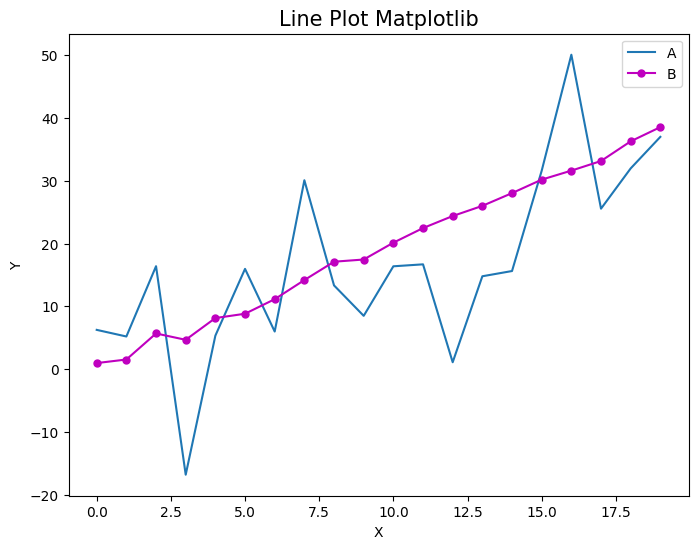

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x=np.arange(20)
y1=np.arange(20)*2+np.random.randn(20)*10
y2=np.arange(20)*2+np.random.randn(20)
plt.figure(figsize=(8,6))
plt.plot(x,y1)
plt.plot(x,y2, color='m', marker='o', markersize=5)
plt.title('Line Plot Matplotlib', size=15)
plt.xlabel('X', size=10)
plt.ylabel('Y', size=10)
plt.legend(labels=['A','B'])
plt.show()

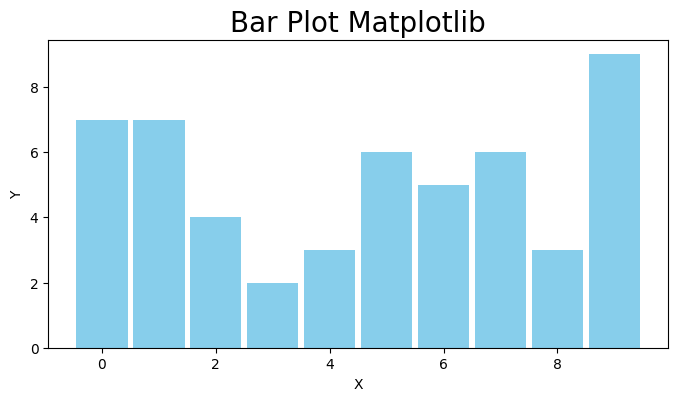

In [53]:
## 막대그래프
y=np.random.randint(2,10, size=10)
x=np.arange(len(y))
plt.figure(figsize=(8,4))
plt.bar(x,y, width=0.9, color='skyblue')
plt.title('Bar Plot Matplotlib', size=20)
plt.xlabel('X', size=10)
plt.ylabel('Y', size=10)
plt.show()

In [55]:
from google.colab import files
# file 업로드
uploaded = files.upload()


Saving auto-mpg.xlsx to auto-mpg.xlsx


Text(0, 0.5, 'WEIGHT')

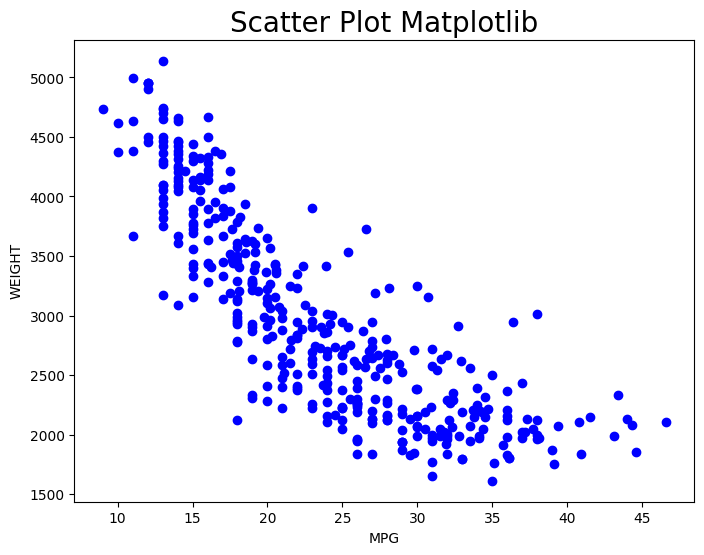

In [59]:
df_auto=pd.read_excel('auto-mpg.xlsx')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y, color='b')
plt.title('Scatter Plot Matplotlib', size=20)
plt.xlabel('MPG', size=10)
plt.ylabel('WEIGHT', size=10)


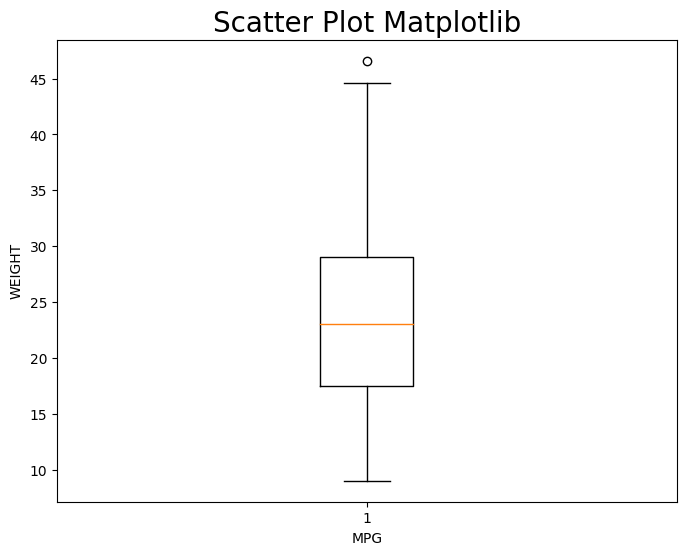

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df_auto.mpg)
plt.title('Scatter Plot Matplotlib', size=20)
plt.xlabel('MPG', size=10)
plt.ylabel('WEIGHT', size=10)
plt.show()



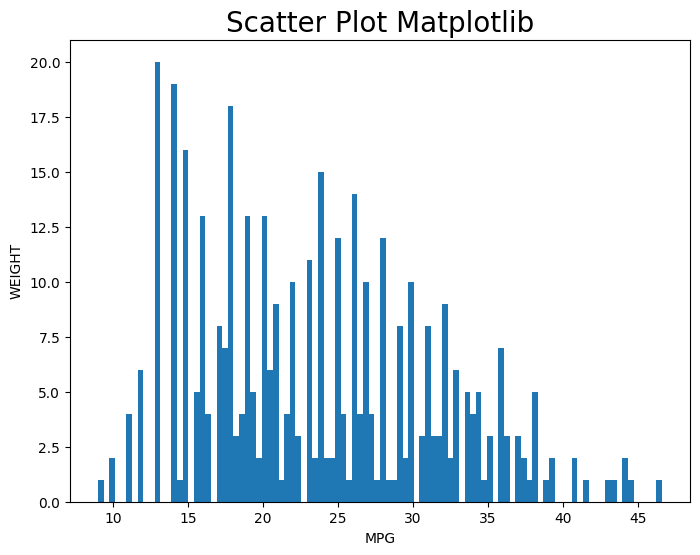

In [78]:
###### PLT HISTO
plt.figure(figsize=(8, 6))
#df_auto['mpg'].plot(kind='hist', bins=100)
plt.hist(df_auto['mpg'], bins=100)
plt.title('Scatter Plot Matplotlib', size=20)
plt.xlabel('MPG', size=10)
plt.ylabel('WEIGHT', size=10)
plt.show()

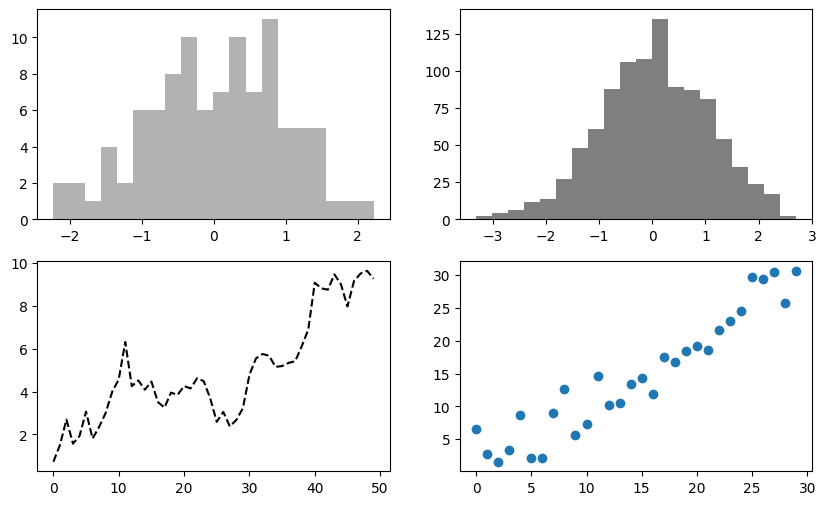

In [81]:
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

x=np.arange(1,21,2)
y=np.array([3,5,6,13,30,21,22,29,33,32])
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.hist(np.random.randn(1000), bins=20, color='k', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))



In [82]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'WEIGHT')

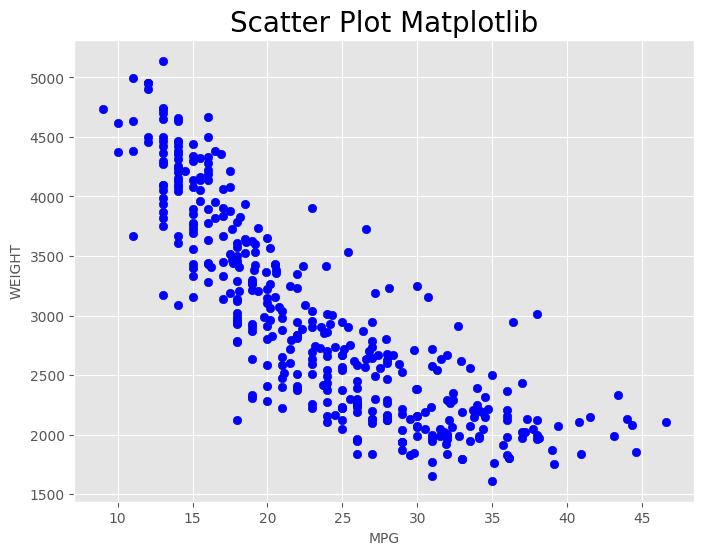

In [85]:
plt.style.use('ggplot')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y, color='b')
plt.grid(True)
plt.title('Scatter Plot Matplotlib', size=20)
plt.xlabel('MPG', size=10)
plt.ylabel('WEIGHT', size=10)
plt.show()

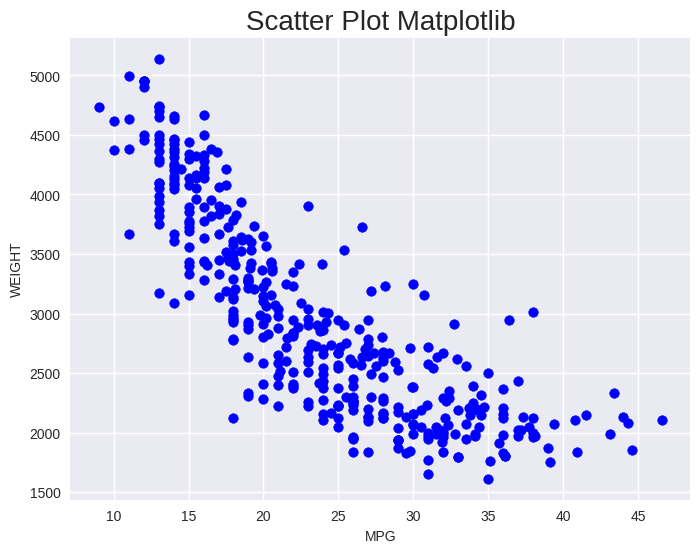

In [87]:
plt.style.use('seaborn-v0_8')
x=df_auto.mpg
y=df_auto.weight
plt.figure(figsize=(8,6))
plt.scatter(x,y, color='b')
plt.grid(True)
plt.title('Scatter Plot Matplotlib', size=20)
plt.xlabel('MPG', size=10)
plt.ylabel('WEIGHT', size=10)
plt.show()

In [88]:
!sudo apt-get install -y fonts-nanum # NanumBarunGothic 글꼴 설치
!sudo fc-cache -five                 # 글꼴 캐시 새로 고침
!rm ~/.cache/matplotlib -rf          # Matplotlib 캐시를 지움

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,781 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

In [2]:
import numpy as np
data=np.random.randn(1000)
cdata=data.cumsum()
print(data[:10])
print(cdata[:10])

[-0.28865994  0.07448223  0.23793414  0.23300688  1.50079318  1.586491
 -0.09408942  0.19696861 -1.37968139 -0.94116032]
[-0.28865994 -0.21417771  0.02375643  0.25676331  1.7575565   3.3440475
  3.24995808  3.44692669  2.0672453   1.12608499]


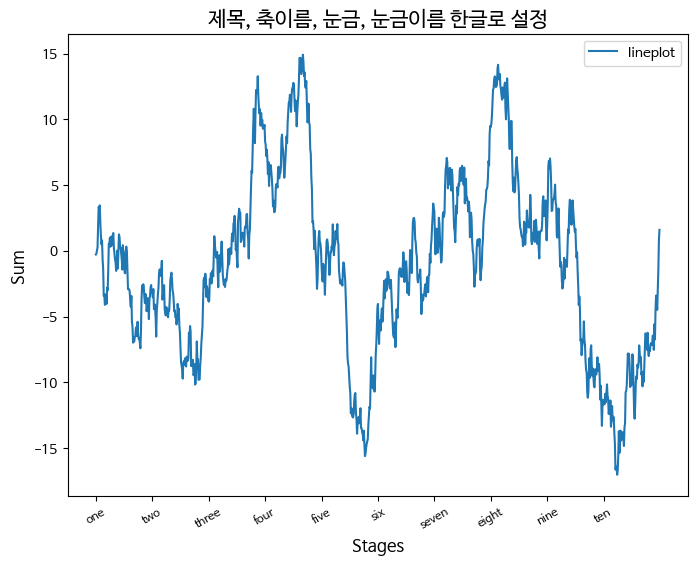

In [5]:

import matplotlib.pyplot as plt


plt.rc('font', family='NanumBarunGothic')       # 한글 폰드 설정
plt.rcParams['axes.unicode_minus'] =False       # 마이너스 부호 출력 설정
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.plot(cdata)
thicks=ax.set_xticks([0,100,200,300,400,500,600,700,800,900])
labels=ax.set_xticklabels(['one','two','three','four','five','six','seven','eight','nine','ten'], rotation=30, fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금이름 한글로 설정', size=15)
ax.set_xlabel('Stages', size=12)
ax.set_ylabel('Sum', size=12)
ax.legend(labels=['lineplot'])
plt.show()


Task1_0617. 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.